<a href="https://colab.research.google.com/github/QuakFooLee/python/blob/main/2_2_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (100, 2)
y shape: (100,)


In [3]:
print(X[:5])
print(y[:5])

[[-0.79415228  2.10495117]
 [-9.15155186 -4.81286449]
 [-3.10367371  3.90202401]
 [-1.42946517  5.16850105]
 [-7.4693868  -4.20198333]]
[0 1 0 0 1]


In [4]:
import numpy as no
from scipy.stats import norm
def fit_distribution(data):
    mu = np.mean(data)
    sigma = np.std(data)
    print(mu, sigma)
    dist = norm(mu,sigma)
    return dist

In [5]:
Xy0 = X[y == 0]

In [6]:
Xy1 = X[y ==1 ]

In [7]:
print(Xy0.shape, Xy1.shape)

(50, 2) (50, 2)


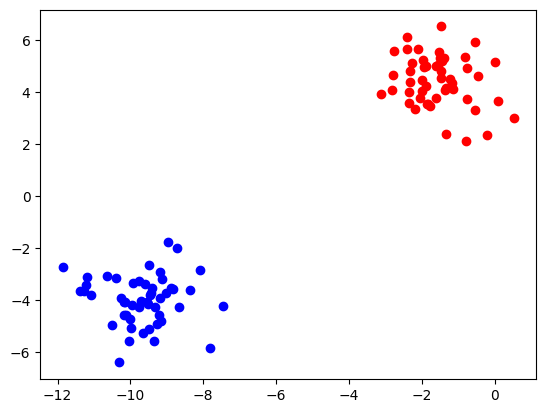

In [8]:
import matplotlib.pyplot as plt
plt.scatter(Xy0[:,0], Xy0[:,1], c='red')
plt.scatter(Xy1[:,0], Xy1[:,1], c='blue')
plt.show()

In [9]:
priory0 = len(Xy0) / len(X)

In [10]:
priory1 = len(Xy1) / len(X)

In [11]:
print(priory0, priory1)

0.5 0.5


In [12]:
distX1y0 = fit_distribution(Xy0[:,0])
distX2y0 = fit_distribution(Xy0[:,1])

-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367


In [13]:
distX1y1 = fit_distribution(Xy1[:, 0])
distX2y1 = fit_distribution(Xy1[:, 1])

-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521


In [14]:
def probability(X, prior, dist1, dist2):
    return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

In [15]:
Xsample, ysample = X[0], y[0]

In [16]:
py0 = probability(Xsample, priory0, distX1y0, distX2y0)

In [17]:
py1 = probability(Xsample, priory1, distX1y1, distX2y1)

In [18]:
print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))

P(y=0 | [-0.79415228  2.10495117]) = 0.348
P(y=1 | [-0.79415228  2.10495117]) = 0.000


In [19]:
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)


In [20]:
model = GaussianNB()
model.fit(X,y)
Xsample, ysample = [X[0]], y[0]
yhat_prob = model.predict_proba(Xsample)

In [21]:
print('Predicted Probabilities: ', yhat_prob)
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
print('Truth: y=%d' % ysample)

Predicted Probabilities:  [[1.00000000e+00 5.52387327e-30]]
Predicted Class:  [0]
Truth: y=0


In [22]:
print('Xsample:', Xsample)
print('Predicted Probabilities: ', yhat_prob)
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
print('True class: y=%d' % ysample)

Xsample: [array([-0.79415228,  2.10495117])]
Predicted Probabilities:  [[1.00000000e+00 5.52387327e-30]]
Predicted Class:  [0]
True class: y=0


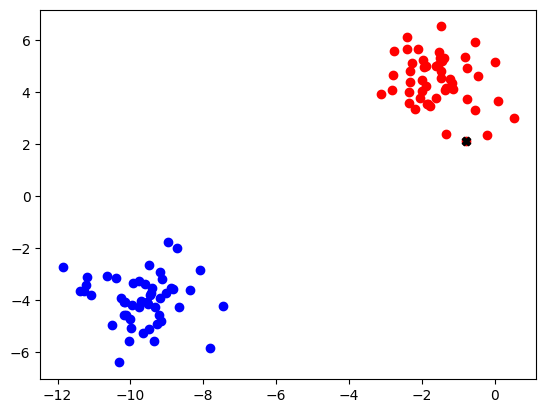

In [23]:
plt.scatter(Xy0[:,0], Xy0[:,1], c='red')
plt.scatter(Xy1[:,0], Xy1[:,1], c='blue')
plt.scatter(Xsample[0][0], Xsample[0][1], c='black', marker='X')

Xsample:
Predicted Probabilities:  [[1.00000000e+00 1.32658236e-32]]
Predicted Class:  [0]


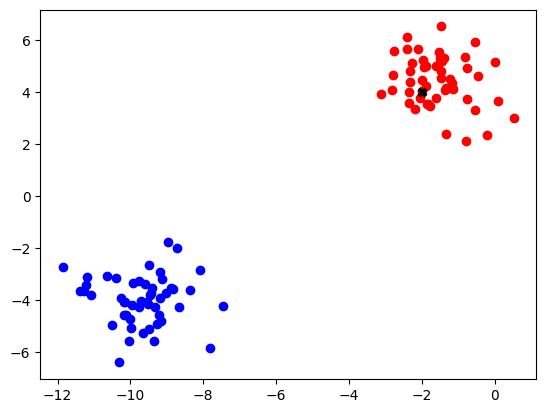

In [24]:
Xsample = np.array([[-2.0, 4.0]])
print('Xsample:')

yhat_prob = model.predict_proba(Xsample)

print ('Predicted Probabilities: ', yhat_prob)
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)

plt.scatter(Xy0[:,0], Xy0[:,1], c='red')
plt.scatter(Xy1[:,0], Xy1[:,1], c='blue')
plt.scatter(Xsample[0][0], Xsample[0][1], c='black', marker='X')